In [33]:
# Q1. What is the mathematical formula for a linear SVM?

In [34]:
# f(x) = sign(w^T x + b)

In [35]:
# Q2. What is the objective function of a linear SVM?

In [36]:
# The objective function of a linear SVM has two forms:

# Primal Form: Minimizes the sum of the margin and slack variables.

# Dual Form: Maximizes the Lagrange multipliers, which represents the margin and classification errors.

# Both forms aim to find the optimal hyperplane that separates the classes with the maximum margin.

In [37]:
# Q3. What is the kernel trick in SVM?

In [38]:
# The kernel trick in SVM is a method to handle non-linearly separable data by transforming it into a higher-dimensional 
# space where it becomes linearly separable. Instead of explicitly mapping data to this higher-dimensional space, the
# kernel trick uses a function (the kernel) to compute the inner product of data points directly in the original space. 
# Common kernels include:

# Linear Kernel: No transformation, used for linearly separable data.
# Polynomial Kernel: Adds polynomial features.
# RBF Kernel: Uses a Gaussian function to handle complex boundaries.
# Sigmoid Kernel: Mimics neural network behavior.

# This trick allows SVM to efficiently find separating hyperplanes in complex data distributions

In [39]:
# Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
# SVM?

In [40]:
# 1. Hyperplane

# Definition: A hyperplane is a decision boundary that separates different classes in the feature space. For a 2D case, it
# is a line; for 3D, it is a plane; and for higher dimensions, it is a hyperplane.

# Example: In a 2D space, if you have two classes of points, the hyperplane would be a line that separates these classes.

# 2. Margin
# Definition: The margin is the distance between the hyperplane and the nearest data points from either class. SVM aims to
# maximize this margin to improve the classifier’s generalization.

# Example: For a line separating two classes, the margin is the distance from this line to the nearest data points (support vectors).

# 3. Hard Margin
# Definition: Hard margin SVM is used when the data is linearly separable, meaning there is a clear boundary with no 
# misclassification. It requires that all data points be correctly classified with no margin violations.

# Example: If your data is perfectly separable, a hard margin SVM would create a boundary with no errors.

# 4. Soft Margin
# Definition: Soft margin SVM allows some misclassifications to handle non-linearly separable or noisy data. It introduces 
# slack variables to tolerate some violations of the margin constraints.

# Example: When data is noisy or not perfectly separable, the soft margin allows the boundary to accommodate some errors 
# for better generalization

In [41]:
# Q6. SVM Implementation through Iris dataset.

# ~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
# ~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
# ~ Compute the accuracy of the model on the testing setl
# ~ Plot the decision boundaries of the trained model using two of the featuresl
# ~ Try different values of the regularisation parameter C and see how it affects the performance of
# the model.

# Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
# performance with the scikit-learn implementation.

In [42]:
# 1.Load the Iris Dataset and Split It

In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
iris = load_iris()
X, y = iris.data, iris.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# 2.Train a Linear SVM Classifier and Predict Labels

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [49]:
model = SVC(kernel='linear', C=1.0)  
model.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
y_pred = model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)

In [52]:
accuracy 

0.9777777777777777

In [53]:
# 3.Plot Decision Boundaries Using Two Features

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
feature1, feature2 = 0, 1 
X_train_2d = X_train[:, [feature1, feature2]]
X_test_2d = X_test[:, [feature1, feature2]]

In [56]:
model_2d = SVC(kernel='linear', C=1.0)
model_2d.fit(X_train_2d, y_train)

SVC(kernel='linear')

In [57]:
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1, 100),
                     np.linspace(X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1, 100))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

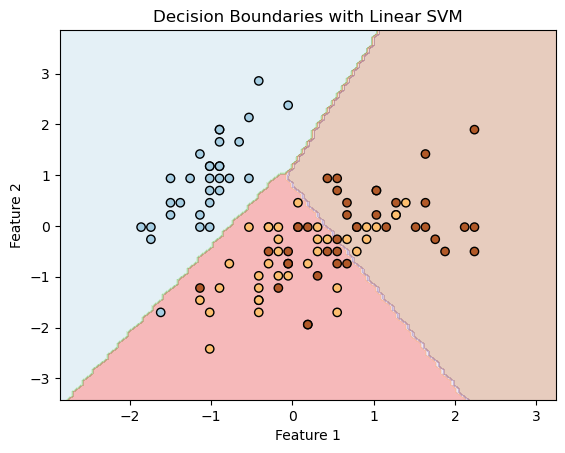

In [58]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
plt.title("Decision Boundaries with Linear SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [59]:
# 4.Try Different Values of the Regularization Parameter C

In [60]:
C_values = [0.1, 1.0, 10.0]
for C in C_values:
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

In [61]:
accuracy

0.9777777777777777